In [1]:
import json
import pandas as pd

# Food Incidents

## Supplier:

In [3]:
data = pd.read_csv('food incidents - supplier/incidents_sample.csv', index_col=0)[['title', 'supplier-title']].fillna('')
data["size"] = [len(s) for s in data.title.values]

data

,title,supplier-title,size
0,Essential Trading recalls Essential Wholefoods...,"(0,16)|(26,34)",100
1,"2013 - The Muffin ""Mam"", Inc. Issues a Recall ...","(7,27)|(73,93)",123
2,2015 - Whole Foods Market Voluntarily Recalls ...,"(7,24)",101
3,Continental Mills Recalls Walmart Great Value ...,"(0,16)",124
4,Wilton Wholefoods recalls its Goji Berries pro...,"(0,16)",50
...,...,...,...
495,Neal's Yard Creamery recalls its 'Hay on Wye' ...,"(0,19)",105
496,Interlink recalls its Pop Millet (Roasted Mill...,"(0,8)",84
497,WH Smith recalls Simpleas Sea Salt and Balsami...,"(0,7)",98
498,Consumption of Our Father's Farm brand bitter ...,"(15,31)",97


Min length: 50
Max length: 245
Avg length: 98.416


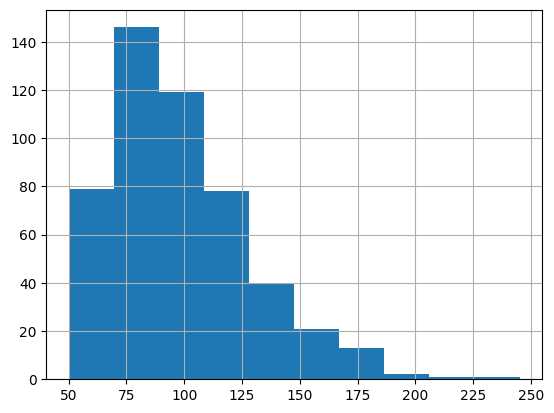

In [4]:
data['size'].hist()

print('Min length:', data['size'].min())
print('Max length:', data['size'].max())
print('Avg length:', data['size'].mean())

## Hazard:

In [5]:
data = pd.read_csv('food incidents - hazard/incidents_sample.csv', index_col=0)[['title', 'hazard-category', 'hazard-raw']].fillna('')
data["size"] = [len(s) for s in data.title.values]

data

,title,hazard-category,hazard-raw,size
0,2012 - Whole Foods Market recalls carrot cake ...,allergens,walnut,100
1,CSM Bakery Solutions recalls its 18 Chocolate ...,biological,salmonella,117
2,Lactalis McLelland Ltd recalls President Mini ...,allergens,nuts,89
3,"Idéale brand, Iceberg Premium brand and Origin...",foreign bodies,metal particles,159
4,Public urged not to consume two kinds of prepa...,chemical,histamine,92
...,...,...,...,...
195,McCain Family Pizza – Possible foreign matter ...,foreign bodies,metal pieces,75
196,Sealtest and Mac's brand Chocolate Milk recall...,organoleptic aspects,spoilage,64
197,CFS follows up on imported frozen beef abomasu...,biological,virus,98
198,Your Fresh Market brand cookies recalled due t...,allergens,almond,74


Min length: 51
Max length: 209
Avg length: 95.995


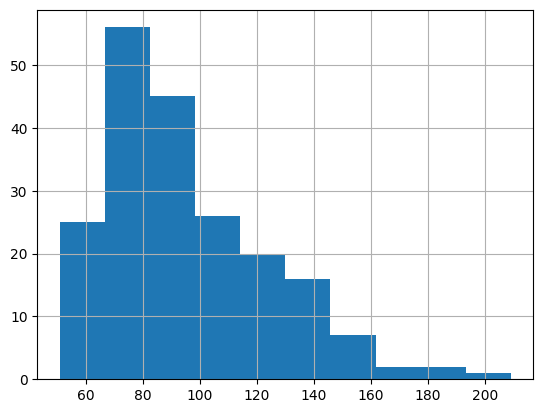

In [6]:
data['size'].hist()

print('Min length:', data['size'].min())
print('Max length:', data['size'].max())
print('Avg length:', data['size'].mean())

In [7]:
data['hazard-category'].value_counts()

hazard-category
biological              77
allergens               53
chemical                29
foreign bodies          20
organoleptic aspects    12
fraud                    9
Name: count, dtype: int64

# Movie Reviews

In [8]:
with open('movies/val_sample.jsonl', 'r') as file:
    dicts = [json.loads(line)[0] for line in file.read().split('\n')[:-1]]

data = pd.DataFrame(columns=["annotation_id", "text", "label", "evidences"])
data["annotation_id"] = [d["annotation_id"] for d in dicts]
data["text"]          = [d["text"] for d in dicts]
data["label"]         = [d["classification"] for d in dicts]
data["evidences"]     = [len(d["evidences"]) for d in dicts]
data["size"]          = [len(s) for s in data.text.values]

data

,annotation_id,text,label,evidences,size
0,negR_800.txt,then there 's his greatest trick -- getting la...,NEG,1,371
1,negR_801.txt,eye of the storm is impressive in visual sense...,NEG,2,443
2,negR_802.txt,fichtner 's performance does n't exactly save ...,NEG,3,448
3,negR_803.txt,"- see , that 's provocative , leaves room for ...",NEG,3,986
4,negR_804.txt,"this is not a cheery movie , and most of the t...",NEG,1,222
...,...,...,...,...,...
195,posR_895.txt,"( he does , in chilling , lasting images . ) i...",POS,1,229
196,posR_896.txt,"since whale lives with only his loyal , but di...",POS,1,623
197,posR_897.txt,"good will hunting "" also has its share of fun ...",POS,1,399
198,posR_898.txt,"first and foremost is joseph mazzello ( "" jura...",POS,3,290


Min length: 48
Max length: 986
Avg length: 344.35


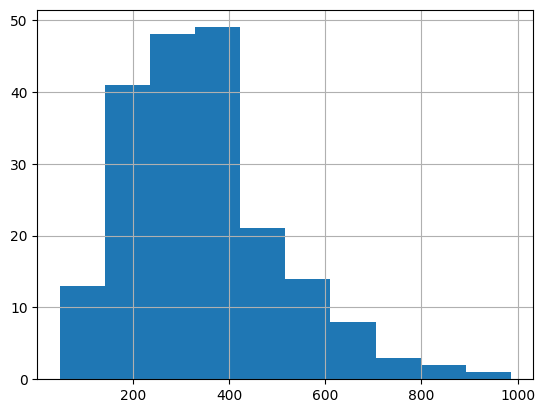

In [5]:
data['size'].hist()

print('Min length:', data['size'].min())
print('Max length:', data['size'].max())
print('Avg length:', data['size'].mean())

Min number of spans: 1
Max number of spans: 6
Avg number of spans: 1.69


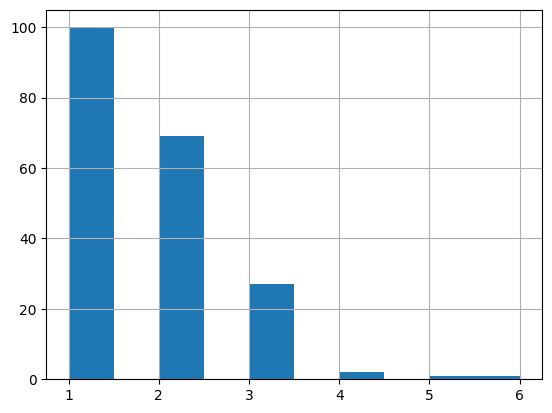

In [9]:
data['evidences'].hist()

print('Min number of spans:', data['evidences'].min())
print('Max number of spans:', data['evidences'].max())
print('Avg number of spans:', data['evidences'].mean())

# Toxic Spans

In [2]:
data = pd.read_csv('toxic spans/sample.csv', index_col=0)[['comment_text', 'label', 'spans']]
data["size"] = [len(s) for s in data.comment_text.values]

data

,comment_text,label,spans,size
comment_id,,,,
253280,What happened to the Willy Week? This revue is...,profane/obscene,fucking stupid,258
261199,Exactly how are Ms. Dodd's mere words more har...,insult,how,334
261940,If you ain't white you ain't right ...story of...,identity based attack,ain't white,99
264846,Why not just shoot him and put him in the free...,identity based attack,shoot,50
284905,Very funny!!!!.. But seriously.... There kids!...,threat,"ets kick,them in the ass",94
...,...,...,...,...
6248886,I'm so sorry for your loss Josey. Ignore these...,insult,trolls,193
6258090,I hate when white trash come floating over fro...,identity based attack,white trash,90
6267972,"And was the Oklahoma bombing, which was our wo...",identity based attack,Muslim terrorist,208


Min length: 50
Max length: 999
Avg length: 227.665


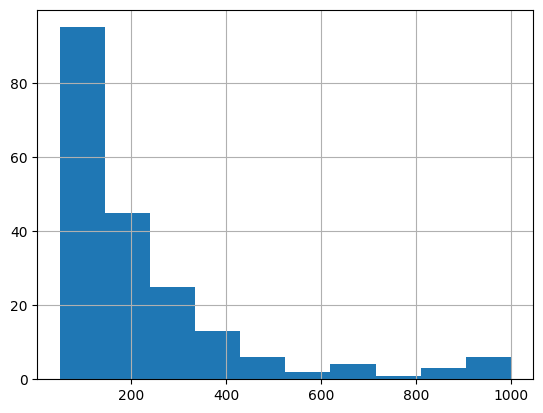

In [3]:
data['size'].hist()

print('Min length:', data['size'].min())
print('Max length:', data['size'].max())
print('Avg length:', data['size'].mean())

In [4]:
data['label'].value_counts()

label
profane/obscene          50
insult                   50
identity based attack    50
threat                   50
Name: count, dtype: int64